In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
data_dir="/content/drive/MyDrive/Water Bodies Datasets"

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    shuffle=True,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 190 files belonging to 3 classes.


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 190 files belonging to 3 classes.
Using 152 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 190 files belonging to 3 classes.
Using 38 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.01,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 190 files belonging to 3 classes.
Using 189 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['mud water', 'oil water', 'pure water']


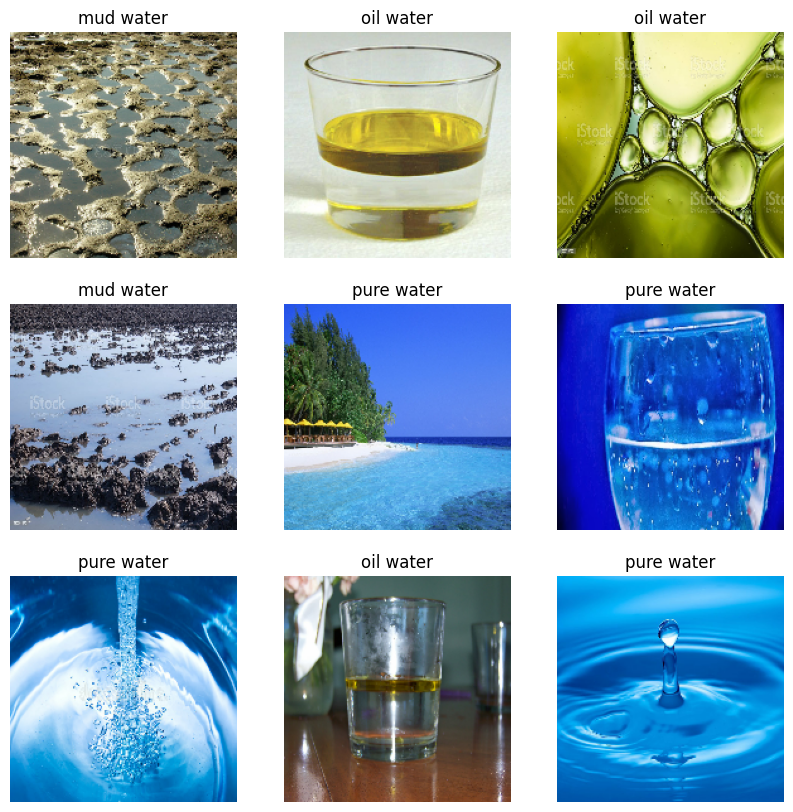

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
5/5 [==============================] - 22s 3s/step - loss: 1.9102 - accuracy: 0.2632 - val_loss: 1.0024 - val_accuracy: 0.4474
Epoch 2/50
5/5 [==============================] - 0s 35ms/step - loss: 0.9732 - accuracy: 0.3947 - val_loss: 0.8111 - val_accuracy: 0.5263
Epoch 3/50
5/5 [==============================] - 0s 32ms/step - loss: 0.8221 - accuracy: 0.5461 - val_loss: 0.6793 - val_accuracy: 0.6053
Epoch 4/50
5/5 [==============================] - 0s 25ms/step - loss: 0.7112 - accuracy: 0.7632 - val_loss: 0.6771 - val_accuracy: 0.6053
Epoch 5/50
5/5 [==============================] - 0s 24ms/step - loss: 0.6390 - accuracy: 0.7829 - val_loss: 0.6428 - val_accuracy: 0.7368
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.5167 - accuracy: 0.8289 - val_loss: 0.5720 - val_accuracy: 0.7368
Epoch 7/50
5/5 [==============================] - 0s 24ms/step - loss: 0.4265 - accuracy: 0.8553 - val_loss: 0.7196 - val_accuracy: 0.6842
Epoch 8/50
5/5 [============

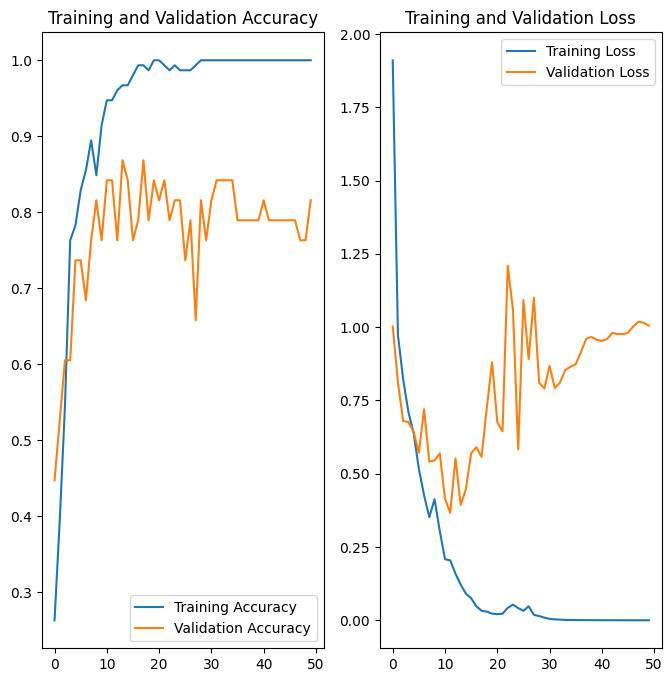

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predict_path = "/content/drive/MyDrive/Water Bodies Datasets/mud water/Image_100.jpg"


img = tf.keras.utils.load_img(
    predict_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 169ms/step
This image most likely belongs to mud water with a 99.98 percent confidence.


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step
Accuracy of the model on test dataset: 84.375


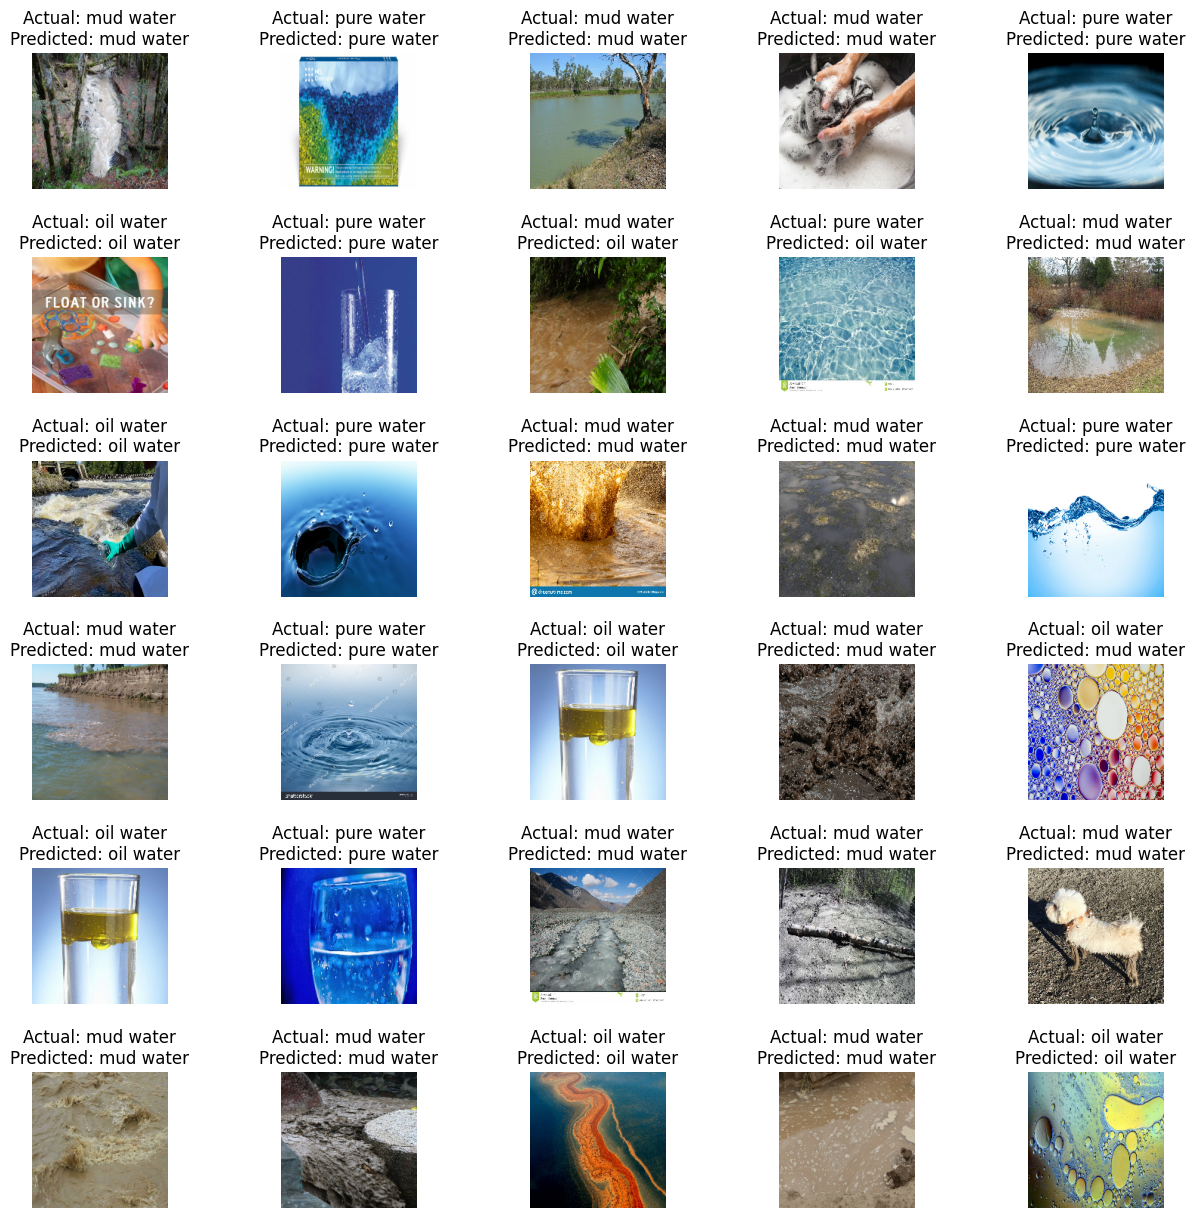

In [ ]:
import matplotlib.pyplot as plt

total_correct = 0
total_samples = 0

plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

batch_num = 0
for images, labels in test_ds:
    batch_num += 1
    batch_correct = 0
    batch_samples = len(images)

    for i in range(len(images)):
        subplot_num = (batch_num - 1) * batch_size + i + 1
        if subplot_num > 30:
            break

        ax = plt.subplot(6, 5, subplot_num)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.subplots_adjust(wspace=0.5)  # Adjust the horizontal spacing between subplots

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        plt.axis("off")

        if predicted_class == actual_class:
            batch_correct += 1

    total_correct += batch_correct
    total_samples += batch_samples

    if subplot_num > 30:
        break

accuracy = (total_correct / total_samples) * 100
print("Accuracy of the model on test dataset:", accuracy)

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
true_labels = []
predicted_labels = []
class_names = test_ds.class_names

# Iterate over the validation dataset and make predictions
for images, labels in test_ds:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_labels.extend(labels)
    predicted_labels.extend(predicted_classes)

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a pandas DataFrame to display the confusion matrix with class names
confusion_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_df)

1/1 [==============================] - 0s 246ms/step
Confusion Matrix:
            mud water  oil water  pure water
mud water          76          3           0
oil water           2         59           0
pure water          0          2          47


In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

6/6 - 3s - loss: 0.2024 - accuracy: 0.9630 - 3s/epoch - 535ms/step


In [ ]:
test_acc*100

96.29629850387573

In [ ]:
model.save('path_to_saved_model')